In [47]:
# import libraries
import json
import networkx as nx
import numpy as np
import os
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
from networkx.algorithms import approximation as app
from scipy.stats import pearsonr
import seaborn as sns
import pylab
from scipy.stats import mannwhitneyu
import datetime
from sklearn.metrics import mean_absolute_error
from math import sqrt
import statsmodels.api as sm
from itertools import chain
import sys
import inspect

# access parent directory from notebooks directory
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

import newsrc.population as p
import newsrc.model as m
import newsrc.tuning as t


%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tuning: communication network

## 1. Grid search: crude (400 parameter combinations)

In [48]:
tuning =  t.Tuning()

/Users/davidblok/Work EUR/GitHub/ABM-PA/newsrc/tuning.py:20: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.nominationPopulation = p.PeerNominatedDataPopulation('Peer-Nominated data population', self.input_args)
<ipython-input-48-7e5a03539d76>:1: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  tuning =  t.Tuning()
/Users/davidblok/Work EUR/GitHub/ABM-PA/newsrc/tuning.py:21: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.communicationPopulation = p.CommunicationDataPopulation('Communication data population', self.input_args)


In [78]:
# specify parameter space for grid search
seq = np.arange(0,1.05,0.05)
result_error, result_child, result_cl, empirical_data = tuning.execute_grid_search(t_range=seq,
                                                                                   i_range=seq,
                                                                                   t=700,
                                                                                   population_name='communication')

thres_PA: 0.0  I_PA: 0.0  error: 0.6064453053673677 |runtime: 6.663196086883545
thres_PA: 0.0  I_PA: 0.025  error: 3.8862715620248816 |runtime: 6.469296932220459
thres_PA: 0.0  I_PA: 0.05  error: 16.361226185820847 |runtime: 6.678416967391968
thres_PA: 0.0  I_PA: 0.07500000000000001  error: 31.77664725980471 |runtime: 7.139762878417969
thres_PA: 0.0  I_PA: 0.1  error: 39.34801910706556 |runtime: 7.257549047470093
thres_PA: 0.0  I_PA: 0.125  error: 41.264931871503514 |runtime: 6.876792907714844
thres_PA: 0.0  I_PA: 0.15000000000000002  error: 41.7684517492336 |runtime: 6.925556898117065
thres_PA: 0.0  I_PA: 0.17500000000000002  error: 41.77758276216128 |runtime: 6.629439830780029
thres_PA: 0.0  I_PA: 0.2  error: 41.80275353035012 |runtime: 6.758136749267578
thres_PA: 0.0  I_PA: 0.225  error: 41.80918314442834 |runtime: 7.120199918746948
thres_PA: 0.0  I_PA: 0.25  error: 41.87982032674713 |runtime: 6.917769908905029
thres_PA: 0.0  I_PA: 0.275  error: 41.87729935323148 |runtime: 7.0251803

### 1.2 Results

In [79]:
# SSE of all parameter combinations
errors_df = pd.DataFrame(result_error).pivot(index=0, columns=1,values=2)
errors_df

1,0.000,0.025,0.050,0.075,0.100,0.125,0.150,0.175,0.200,0.225,...,0.750,0.775,0.800,0.825,0.850,0.875,0.900,0.925,0.950,0.975
0,,,,,,,,,,,,,,,,,,,,,
0.000,0.606445,3.886272,16.361226,31.776647,39.348019,41.264932,41.768452,41.777583,41.802754,41.809183,...,4.208085e+01,4.206085e+01,4.210626e+01,4.205281e+01,42.103887,42.102851,42.102286,42.124749,42.120964,42.034539
0.025,0.606445,307.882071,84.760377,21.468972,5.701368,2.764243,2.593753,4.531839,6.337814,8.411802,...,3.077939e+01,3.173808e+01,3.178666e+01,3.290748e+01,32.822977,33.980004,34.661319,36.235442,37.028548,39.669457
0.050,0.606445,155.525348,386.735456,214.774296,83.968927,51.376648,27.183840,17.628065,8.460745,4.659936,...,2.106552e+01,2.185676e+01,2.428350e+01,2.508714e+01,24.686083,26.243125,30.082099,32.120280,34.344200,36.510465
0.075,0.606445,1.552894,626.367735,510.471402,259.805846,190.671878,106.500187,63.599049,46.396102,31.703256,...,1.368331e+01,1.372223e+01,2.964885e+13,1.705403e+01,19.009357,20.983484,22.949273,25.281482,30.304227,34.280181
0.100,0.606445,1.467093,227.488755,619.273775,572.693145,360.895718,242.397499,172.229805,117.618428,99.047157,...,3.887665e+43,1.697114e+34,1.160595e+01,1.144326e+01,14.054189,15.071549,18.358230,21.441792,25.775018,32.646434
0.125,0.606445,1.529236,438.453218,551.007345,709.563777,556.234273,377.838565,301.191133,276.633647,176.398260,...,5.283447e+00,4.448730e+00,7.118823e+00,3.960383e+06,9.970168,12.505400,13.225318,19.825045,24.776111,31.904350
0.150,0.606445,1.456647,1.735168,187.703060,445.626890,812.661344,679.277689,534.044587,384.577810,318.268146,...,3.717304e+00,4.305924e+00,5.409038e+00,5.970706e+00,5.018893,8.330815,11.008902,14.355108,22.571103,30.217554
0.175,0.606445,1.440647,1.606028,1.981857,412.985570,567.436717,567.668610,654.111976,542.416998,376.782094,...,1.141425e+01,3.494427e+00,2.974900e+00,4.728090e+00,4.176757,7.061155,8.916664,13.411398,18.884086,27.060837
0.200,0.606445,1.433857,1.632935,1.790132,522.516555,599.869140,424.556749,842.853786,667.195517,499.353982,...,1.046879e+01,8.010336e+00,3.864891e+20,3.593669e+00,4.521340,4.704436,9.094815,11.560537,19.035783,24.136379


Text(0.5, 105.0, 'I PA')

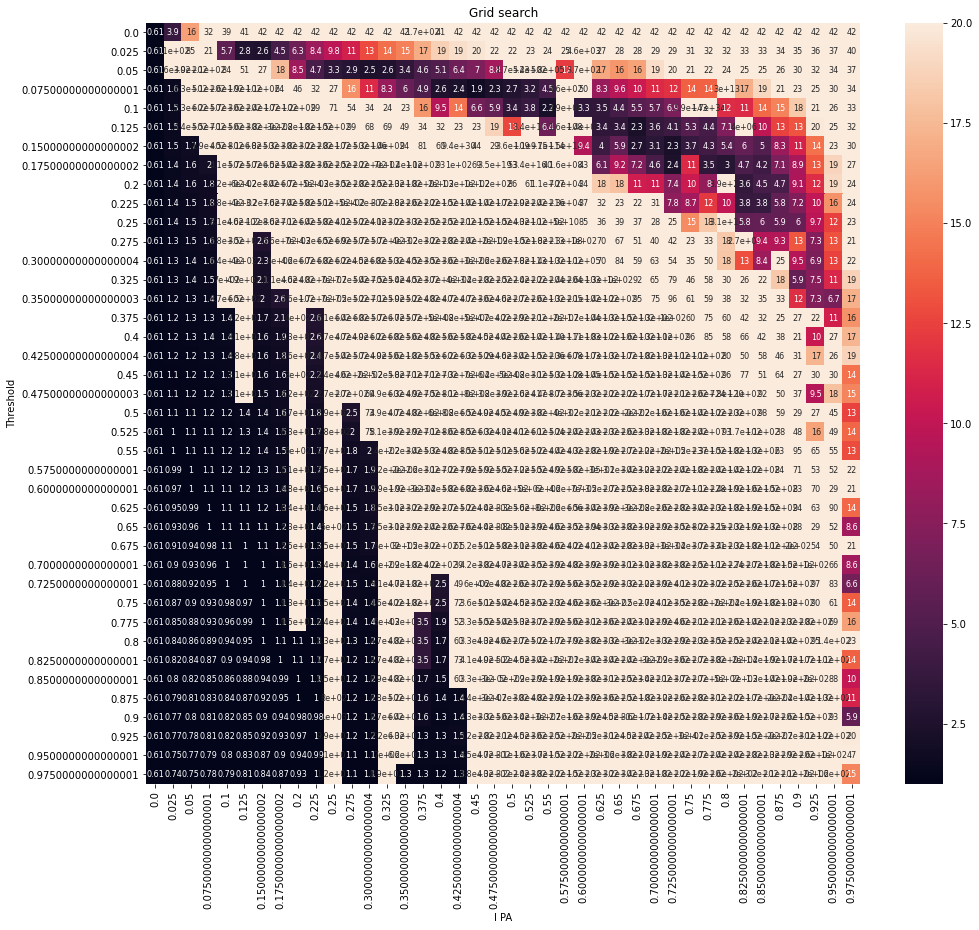

In [80]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df, annot=True, annot_kws={"size": 8}, vmin=1, vmax=20)
plt.ylabel('Threshold')
plt.xlabel('I PA')

### 1.3 Optimal fit

<AxesSubplot:>

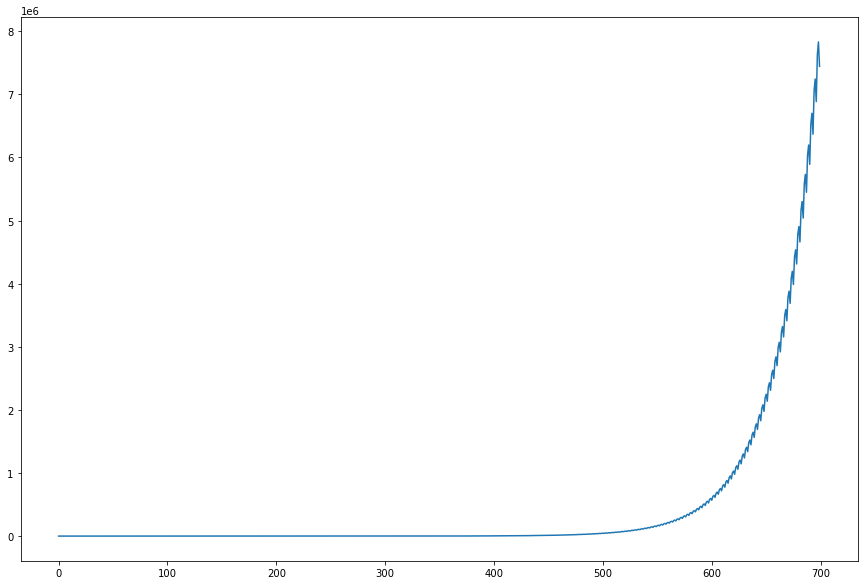

In [81]:
a = pd.DataFrame(result_cl[382]).mean(axis=1)

a.plot(figsize=((15,10)))








## 2. Grid search: subspace (2000 parameter combinations)

### 2.1. Running

In [49]:
# specify parameter space for grid search
t_seq = np.arange(0.025,1.025,0.025)
i_seq = np.arange(0.001,0.051,0.001)


# i_seq < 0.1
#random.seed(4321)
#i_seq = []
#for i in range(20):
#    i_seq.append(random.uniform(0,0.05))
#i_seq.sort()




In [50]:
result_error2, result_child2, result_cl2, empirical_data2 = tuning.execute_grid_search(t_range=t_seq,
                                                                                   i_range=i_seq,
                                                                                   t=700,
                                                                                   population_name='communication')

thres_PA: 0.025  I_PA: 0.001  error: 0.6861800800475909 |runtime: 6.753343105316162
thres_PA: 0.025  I_PA: 0.002  error: 0.8320318322315804 |runtime: 6.259001970291138
thres_PA: 0.025  I_PA: 0.003  error: 0.8460300695058858 |runtime: 5.662626028060913
thres_PA: 0.025  I_PA: 0.004  error: 0.8660885235172677 |runtime: 5.666616916656494
thres_PA: 0.025  I_PA: 0.005  error: 0.8726335850013921 |runtime: 5.500236988067627
thres_PA: 0.025  I_PA: 0.006  error: 0.9066456977417395 |runtime: 5.510686874389648
thres_PA: 0.025  I_PA: 0.007  error: 0.9432069118736688 |runtime: 5.508414030075073
thres_PA: 0.025  I_PA: 0.008  error: 0.9389120906331614 |runtime: 5.5009660720825195
thres_PA: 0.025  I_PA: 0.009000000000000001  error: 0.966703154469161 |runtime: 5.419589996337891
thres_PA: 0.025  I_PA: 0.010000000000000002  error: 1.0399546197853293 |runtime: 5.493042945861816
thres_PA: 0.025  I_PA: 0.011  error: 1.0174727942158124 |runtime: 5.397529125213623
thres_PA: 0.025  I_PA: 0.012  error: 1.3964787

### 2.2 Results

In [51]:
# SSE of all parameter combinations
errors_df2 = pd.DataFrame(result_error2).pivot(index=0, columns=1,values=2)
errors_df2

1,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.010,...,0.041,0.042,0.043,0.044,0.045,0.046,0.047,0.048,0.049,0.050
0,,,,,,,,,,,,,,,,,,,,,
0.025,0.686180,0.832032,0.846030,0.866089,0.872634,0.906646,0.943207,0.938912,0.966703,1.039955,...,151.636748,121.552718,102.634671,103.452120,102.271960,102.728087,82.249349,95.858000,81.744120,89.457710
0.050,0.709777,0.979897,1.083340,1.088828,1.109655,1.132740,1.165151,1.142996,1.168727,1.201224,...,320.670345,318.433301,401.447073,301.158902,312.646410,488.607309,409.408312,426.394658,399.062885,408.350313
0.075,0.746130,1.133589,1.329808,1.343926,1.363533,1.376776,1.426329,1.426793,1.401168,1.425132,...,329.278037,356.732056,373.936708,188.041866,118.718381,139.842841,363.424286,243.457562,446.551200,559.374515
0.100,0.785362,1.213556,1.470891,1.484892,1.507868,1.542259,1.548497,1.558536,1.556732,1.608932,...,518.672707,671.445152,334.173324,2.589165,2.485165,123.979384,2.490826,137.447424,337.747561,268.222394
0.125,0.782293,1.213187,1.494506,1.518825,1.528100,1.538971,1.559747,1.574199,1.582218,1.611199,...,581.037041,434.445455,2.336804,2.436305,2.466286,2.309755,2.568810,219.647442,409.011621,381.299632
0.150,0.794999,1.244062,1.570234,1.575540,1.591586,1.601904,1.617535,1.637659,1.640619,1.642185,...,914.924475,2.213219,2.263098,2.321179,2.329044,2.385247,2.510833,2.406943,418.565080,599.192053
0.175,0.794789,1.269923,1.551838,1.568653,1.563071,1.586205,1.585235,1.588291,1.619890,1.646557,...,2.152231,2.078148,2.127013,2.232505,2.305719,2.157305,2.212803,2.366161,602.729842,840.193807
0.200,0.771939,1.186262,1.406230,1.419528,1.437152,1.448629,1.460726,1.463551,1.465295,1.492831,...,1.944746,1.855359,1.957079,1.919236,1.907440,1.968852,2.025940,2.073985,760.147503,2.207797
0.225,0.753366,1.113681,1.296814,1.302069,1.315112,1.322309,1.340351,1.356035,1.355807,1.357555,...,1.734103,1.665617,1.749778,1.674743,1.701324,1.782343,1.803166,1.881738,1.857129,1.797127


Text(0.5, 105.0, 'I PA')

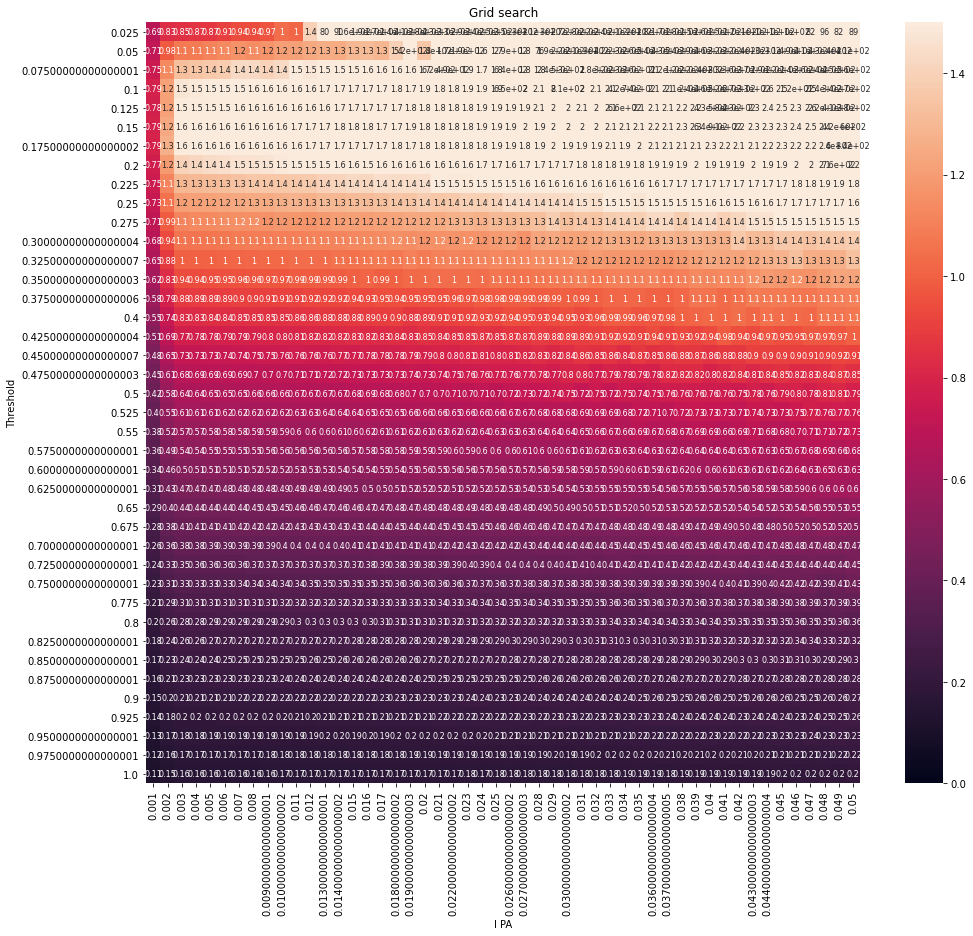

In [54]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df2, annot=True, annot_kws={"size": 8}, vmin=0, vmax=1.5)
plt.ylabel('Threshold')
plt.xlabel('I PA')

0      1.405592
1      1.398214
2      1.391594
3      1.386977
4      1.385015
         ...   
695    3.279876
696    3.279227
697    3.281662
698    3.280808
699    3.286797
Length: 700, dtype: float64

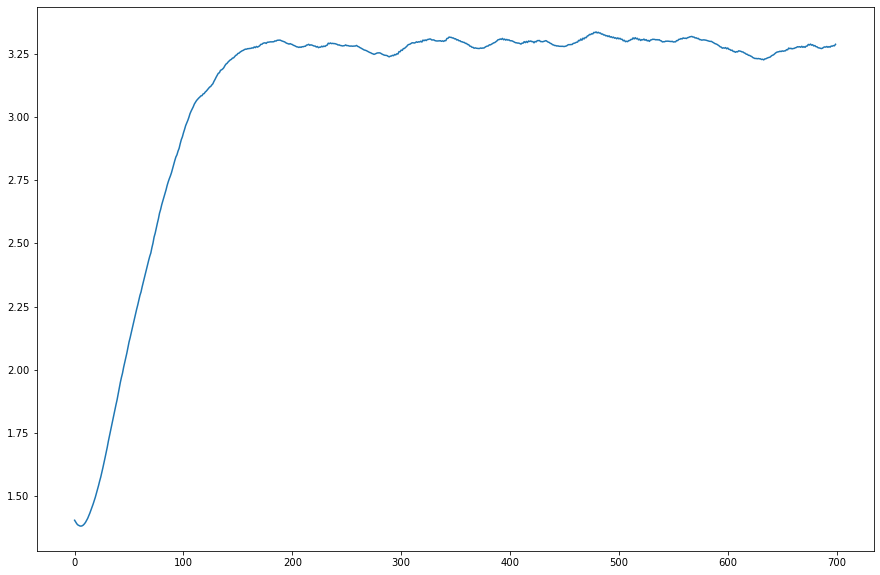

In [71]:
a = pd.DataFrame(result_cl2[45]).mean(axis=1)

a.plot(figsize=((15,10)))
a


### 2.3 Select best fitting parameter combinations

In [84]:
sort_errors = result_error2

b=tuple(sort_errors)
b2 = sorted(b, key=lambda x:x[2])
b3  = b2[0:100]
b3



tuple

In [89]:
import csv

with open('../output/opt_pars_communication.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['threshold','ipa', 'error'])
    for row in b3:
        csv_out.writerow(row)






